In [73]:
#import liberies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [74]:
#import data from csv
data_path= './salaries.csv'

data_salary = pd.read_csv(data_path)

data_salary

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Business Intelligence Engineer,202800,USD,202800,US,0,US,L
1,2023,SE,FT,Business Intelligence Engineer,104300,USD,104300,US,0,US,L
2,2023,MI,FT,Data Manager,60000,GBP,73824,GB,0,GB,M
3,2023,MI,FT,Data Manager,55000,GBP,67672,GB,0,GB,M
4,2023,SE,FT,Data Scientist,290000,USD,290000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
7969,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
7970,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
7971,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
7972,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


#1A

In [75]:
#create a dataframe with the columns needs of 1a.
select_columns=['experience_level','company_size','company_location','salary_in_usd','remote_ratio','work_year']
data_salary_redf = data_salary[select_columns].copy()
data_salary_redf






,experience_level,company_size,company_location,salary_in_usd,remote_ratio,work_year
0,SE,L,US,202800,0,2023
1,SE,L,US,104300,0,2023
2,MI,M,GB,73824,0,2023
3,MI,M,GB,67672,0,2023
4,SE,M,US,290000,0,2023
...,...,...,...,...,...,...
7969,SE,L,US,412000,100,2020
7970,MI,L,US,151000,100,2021
7971,EN,S,US,105000,100,2020
7972,EN,L,US,100000,100,2020


In [76]:
#calculate the employee number by country  and add the avg_salary column to the dataframe
emp_by_country = data_salary_redf['company_location'].value_counts()
emp_by_country = emp_by_country.head()
emp_by_country = emp_by_country.to_frame().rename(columns={'count':'emp_num'})
emp_by_country






,emp_num
company_location,
US,6817
GB,397
CA,181
ES,106
DE,72


In [77]:
#Calculate the avg_salary for each county in the emp_by_country dataframe
avg_salary= data_salary_redf.groupby('company_location')['salary_in_usd'].mean().reset_index()
avg_salary = avg_salary.rename(columns={'salary_in_usd':'avg_salary'})
avg_salary
    




,company_location,avg_salary
0,AD,50745.000000
1,AE,100000.000000
2,AM,50000.000000
3,AR,62000.000000
4,AS,34026.500000
...,...,...
68,TH,22971.333333
69,TR,22313.600000
70,UA,135600.000000
71,US,158694.199061


In [78]:
# merge both df
emp_by_country = emp_by_country.merge(avg_salary,how='left',on='company_location')
emp_by_country

,company_location,emp_num,avg_salary
0,US,6817,158694.199061
1,GB,397,107043.843829
2,CA,181,142539.519337
3,ES,106,56658.179245
4,DE,72,90456.666667


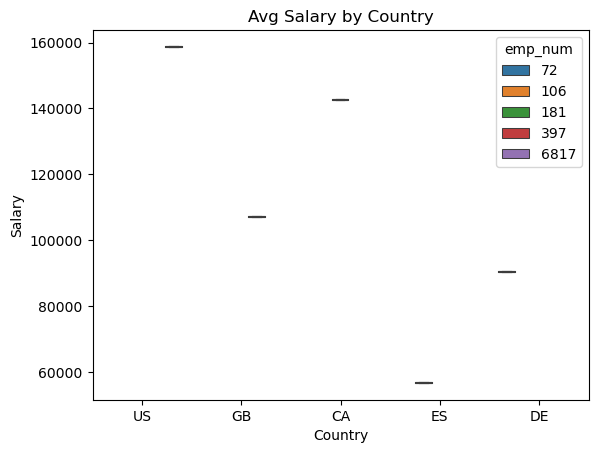

In [79]:
sns.boxplot(x='company_location',y='avg_salary',hue= 'emp_num',data= emp_by_country)
plt.xlabel('Country')
plt.ylabel('Salary')
plt.title('Avg Salary by Country')
plt.xticks()

plt.show()



In [80]:
salary_by_country = data_salary_redf.merge(emp_by_country,how='inner',on='company_location')
salary_by_country

,experience_level,company_size,company_location,salary_in_usd,remote_ratio,work_year,emp_num,avg_salary
0,SE,L,US,202800,0,2023,6817,158694.199061
1,SE,L,US,104300,0,2023,6817,158694.199061
2,SE,M,US,290000,0,2023,6817,158694.199061
3,SE,M,US,173200,0,2023,6817,158694.199061
4,SE,M,US,235000,100,2023,6817,158694.199061
...,...,...,...,...,...,...,...,...
7568,MI,L,DE,88654,50,2021,72,90456.666667
7569,EN,S,DE,62726,50,2020,72,90456.666667
7570,MI,L,DE,90734,50,2021,72,90456.666667
7571,SE,M,DE,173762,100,2021,72,90456.666667


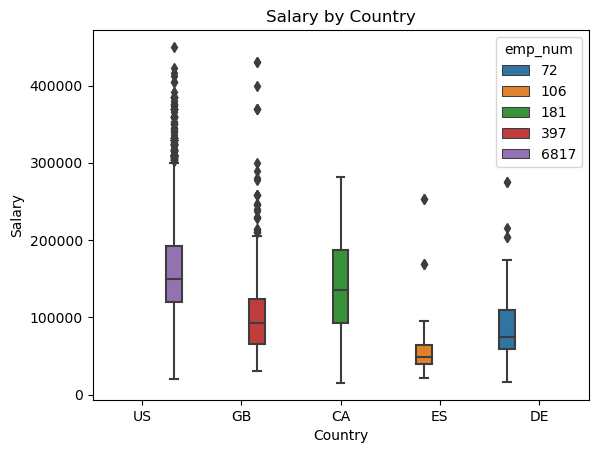

In [81]:
sns.boxplot(x='company_location',y='salary_in_usd',hue= 'emp_num',data= salary_by_country)
plt.xlabel('Country')
plt.ylabel('Salary')
plt.title('Salary by Country')
plt.xticks()

plt.show()

#1C

In [84]:
# calculate the avg salary vs remote ratio
avg_salary= data_salary_redf.groupby(['remote_ratio','work_year'])['salary_in_usd'].mean().reset_index()
avg_salary = avg_salary.rename(columns={'salary_in_usd':'avg_salary'})
avg_salary

,remote_ratio,work_year,avg_salary
0,0,2020,94258.111111
1,0,2021,106835.758621
2,0,2022,135076.266573
3,0,2023,160358.056051
4,50,2020,86879.142857
5,50,2021,81311.821918
6,50,2022,84297.524590
7,50,2023,80834.016393
8,100,2020,115214.083333
9,100,2021,109905.275862


In [90]:
# categorized the differents ratios

remote_types= {0:'Remote',
               50:'Hibrid',
               100:'Presential'}

avg_salary['remote_type']= avg_salary['remote_ratio'].map(remote_types)
avg_salary


,remote_ratio,work_year,avg_salary,remote_type
0,0,2020,94258.111111,Remote
1,0,2021,106835.758621,Remote
2,0,2022,135076.266573,Remote
3,0,2023,160358.056051,Remote
4,50,2020,86879.142857,Hibrid
5,50,2021,81311.821918,Hibrid
6,50,2022,84297.524590,Hibrid
7,50,2023,80834.016393,Hibrid
8,100,2020,115214.083333,Presential
9,100,2021,109905.275862,Presential


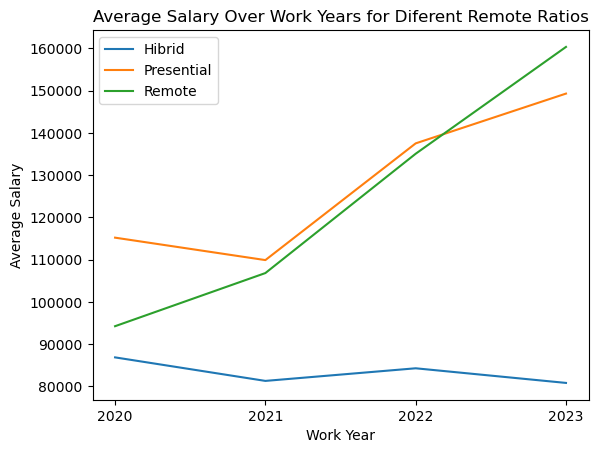

In [92]:
# create bar plot of the avg salary vs remote ratio
for r_type, group in avg_salary.groupby ('remote_type'):
    
    plt.plot(group['work_year'],group['avg_salary'],label=r_type)

plt.xticks(avg_salary['work_year'].unique())
plt.xlabel('Work Year')
plt.ylabel('Average Salary')
plt.title('Average Salary Over Work Years for Diferent Remote Ratios')
plt.legend()
plt.show()